# The WHO and WHY of Telco Churn 
### Exploring & Evaluating Telco data to create a classification model that predicts customer churn
by Jennifer Eyring
Jemison Cohort

## <u> Executive Summary: </u>
#### - Key demographic groups that churn: Senior citizens and Single Telco customers
#### - Main churn features that relate to these demographics:
        - Fiber Optic Internet Service
        - Non-automated Payment forms (more exploration will be needed here)

## <u> Data Dictionary</u>

- The Telco dataset was collect from CodeUp's MySQL database. <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">You can read more about the Telco data set here.</a>


|Target|Datatype|Definition|
|:-------|:--------|:----------|
| churn | 7043 non-null: object | Telco's recent customer churn list |

|Feature|Datatype|Definition|
|:-------|:--------|:----------|
| gender           |  7043 non-null: object | gender of Telco customers|
| senior_citizen   |  7043 non-null: int64  | 60+ aged Telco customers|
| partner          |  7043 non-null: object | Telco customers with/without partner|
| dependents       |  7043 non-null: object | Customers with/without dependents|
| contract_type    |  7043 non-null: object | Contract types for customers|
| internet_service_type |  7043 non-null: object | None; DSL; Fiber Optic types|
| payment_types    |  7043 non-null: object | payment forms for Customers|


# <u> Project Question: </u>
### <i> Is there a specific demographic group that is associated with more churn than expected?

## <u> Goal:</u>
### Find the main demographic drivers and their subgroups for Telco churn.
*I decided to look into demographics first, as I did not get to explore these variables in our last presentation project.

In [3]:
import warnings
warnings.filterwarnings("ignore")

#adding those necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pydataset as data

#sklearn tools:: working those models!
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#calling those py files
from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

#calling the dataframe
telco_df = get_telco_data()
#prepped and split
train, validate, test = prep_telco_data(telco_df)

#visualization file
import viz

# <u> Telco's Churn Rate: </u>  
Telco's churn rate was at 27% this past month.

<AxesSubplot:xlabel='churn', ylabel='Count'>

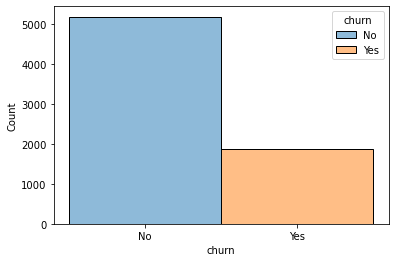

In [20]:
sns.histplot(data=telco_df, x="churn", hue='churn')

# <u> Hypothesis Testing </u>

## QUESTION 1: Are more churned customers single and/or without dependents?

### Hypothesis 1:
- <i>H0: There is NO relationship between churn and customers without partners
- <i>Ha: There IS a relationship between churn and customers without partners

In [2]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to partnerships of customers
# Alternative hypothesis: there is a relationship between churn rate and partnerships of customers
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that partnership and churn are independent")

The p-value is 2.0115703972096128e-23
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

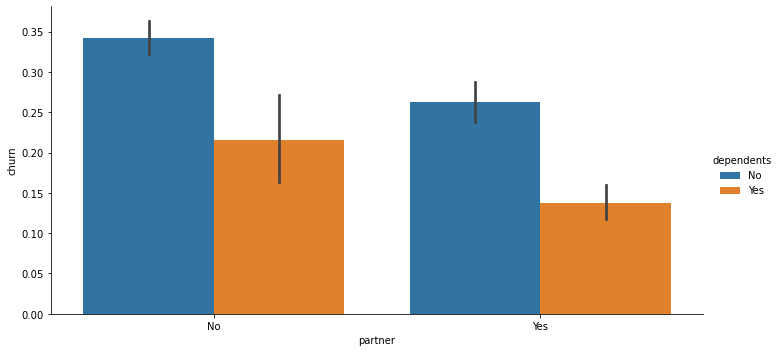

In [21]:
#Relationship between churn, customers having partners and dependents
sns.catplot(x="partner", y ="churn",  hue="dependents",data=train, kind="bar", height=5, aspect=2)

### <i> OUTCOME: 
#### - I rejected the Null Hypothesis, in that there is a relationship with single customers and churn.

## __________________________________________________________________________________________

## QUESTION 2: Are more Senior Citizens churning than other age groups?

Hypothesis 2:

* <i>H0: There is NO relationship between churn and Senior customers.
* <i>Ha: There IS a relationship between churn and Senior customers.

In [4]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to senior citizen customers
# Alternative hypothesis: there is a relationship between churn rate and senior citizens
alpha = 0.05
observed = pd.crosstab(train.churn, train.senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior_citizens and churn are independent")

The p-value is 1.1002429756735793e-26
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

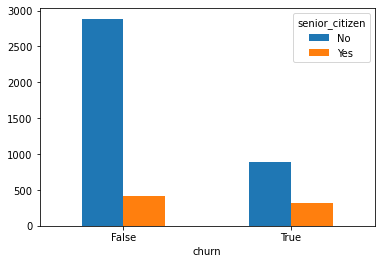

In [5]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

### <i> OUTCOME: 
    I rejected the Null Hypothesis, in that there is a relationship with senior customers and churn.
   
- From first glance, because of the low amount of Senior Citizen data count, it looks like customers 59 and younger have more churns. By numbers, YES, 59 and younger DO have more churn, but <b><mark>by churn rate compared to each customer age category, Senior Citizens have the highest churn rate.</mark></b>

### <mark><b>  Senior Citizens: 41% churned
59 and younger customers: 24% churned</b></mark>
    
    
    
    
    
    


# Why the Churn??

## INTERNET TYPE ACCOUNTS- Are you getting enough FIBER??

### Seeing if internet type relates to the churn rate.

* H0: There is NO relationship between internet type of accounts and customers churning.
* Ha: There IS a relationship between internet type of and customers churning.

In [6]:
# Chi squared with un-encoded categorical columns
alpha = 0.05
observed = pd.crosstab(train.internet_service_type, train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior customers and internet account types are independent")

The p-value is 2.4617612720873587e-96
Sufficient evidence is present to reject the null hypothesis


### <i> Seniors that churned and their internet services:

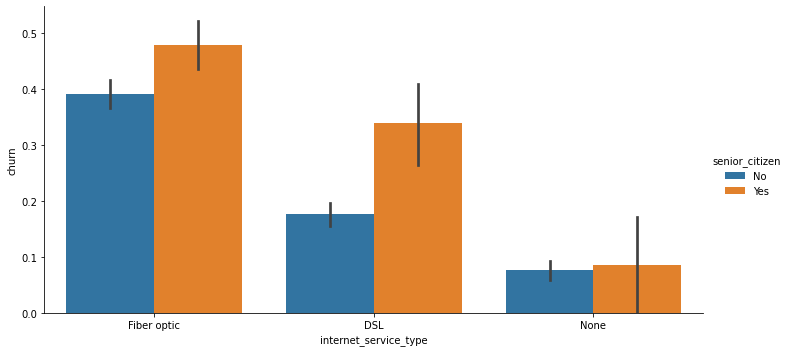

In [22]:
#Relationship between Senior customers and their internet service type against their churn rate
sns.catplot(x="internet_service_type", y ="churn",  hue="senior_citizen",data=train, kind="bar",height=5, aspect=2)

### <i> Singles that churned and their internet services:

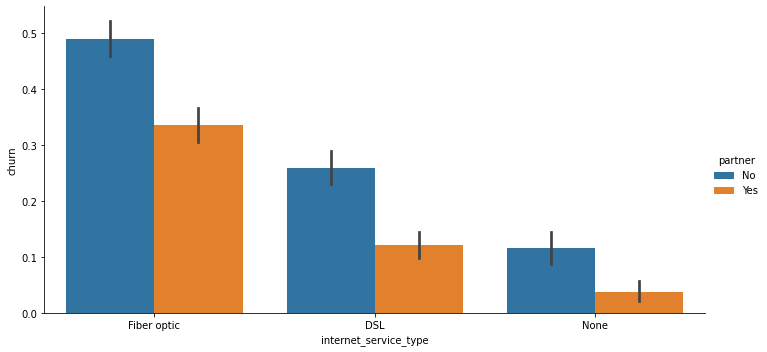

In [23]:
#Relationship between Single Telco customers and their internet service type against their churn rate
sns.catplot(x="internet_service_type", y ="churn",  hue="partner",data=train, kind="bar", height=5, aspect=2)

# MODELING: Strike a pose...and get learning

*******<b>TECH-NOTE:</b>
When creating my models, I had to drop categorical columns (as shown in syntax below), as well as set my x and y for train, validate and test

### <b>For a more in-depth look at what I did for each train/fitting of the models, check out:</b>

### <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Telco Churn Scratch Pad here.</a>

### <b>Defining the BASELINE: 73%</b>

When training & exploring the models, I am looking for models that are showing an accuracy score over 73% and that are also showing a 4% or less difference between the training accuracy and validation accuracy scores. 

In [5]:
#Defining the baseline prediction:
train.churn.mode()
#Mode meaning when a customer did not churn, so our baseline guess would be that a customer will not churn. 


#Calculating the percentage of customers that churned:
train[train['churn'] == False].shape[0] / train.shape[0]

0.7342222222222222

In [25]:
# ADDING IN THE CODE TO SPLIT AND ADD VISUALS.
## Dropping categorical and not-needed columns that are leftover.

X_train = train.drop(columns=['churn','customer_id','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','internet_service_type','total_charges'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['customer_id','churn','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','online_security','online_backup',
                              'payment_type','total_charges','device_protection','internet_service_type','total_charges'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['customer_id','churn','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','internet_service_type','total_charges'])
y_test = test[['churn']]

## MVP Models - Takeaways

<i><b>What Models I Used and outcomes:</b>
- 1) DecisionTree classifier: 83%train | 79%validate | 4%diff
- 2) RandomForest classifier: 84%train | 80%validate | 3%diff
- 3) Logistical Regression:   80%train | 74% with key features
- 4) KNNeighbors classifier:  81%train | 79%validate | 2%diff
<br>
<br>
- My DecisionTree models show some great training accuracies (83%) but the differences between validation and training concern me and I decided not to choose any of those for my MVP due to concerns of overfitting the data.


- My Random Forest models were a close second choice as training accuracy with a max depth of 9 was 84% | validate was 81%...but I still felt like the differences (and drops shown in the validation chart) weren't as predictable in finding a constant rate to test the model on.


- <mark><b>I decided on using my KNN model</b> with an 10 count of neighbors to help predict new data as relative to churn or not. <b>My KNN model had a 81% accuracy rate (8% higher than baseline)</b> and because KNN models and take in real-time occurances and can be adjusted over time, this model will do well not only now for predicting the churn, but can also be a model we can move forward with as we make necessary adjustments due to churn and what the next churn predictors might be.</mark>


### <u> CHOSEN KNN MODEL FOR TESTING BREAKDOWN:</u>

1) Creating, Fitting, trying different neighbor counts

In [6]:
#### KNN MODEL CREATION SYNTAX:

#Setting neighbors to 5
#fitting the model to data
#making predictions and estimation of probabilities
#______________________________________________________
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#fit the model
knn.fit(X_train, y_train)
#making predictions
y_pred = knn.predict(X_train)
#estimating probabilities
y_pred_proba = knn.predict_proba(X_train)

2) Evaluating the Model:
    * I am showing the model I chose that had a neighbor count of 10 and what the evaluation of that looked like.

In [7]:
#### EVALUATING THE MODEL W/ 10 NEIGHBORS:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,False,True,accuracy,macro avg,weighted avg
precision,0.861960,0.696117,0.824,0.779038,0.817882
recall,0.905266,0.599498,0.824,0.752382,0.824000
f1-score,0.883082,0.644205,0.824,0.763644,0.819594
support,3304.000000,1196.000000,0.824,4500.000000,4500.000000


3) Using visualizations:
    This visualization of train, validate and difference of accuracy side-by-side was useful to help me visually see and think through what other neighbor counts would look like and the gap of difference between the models

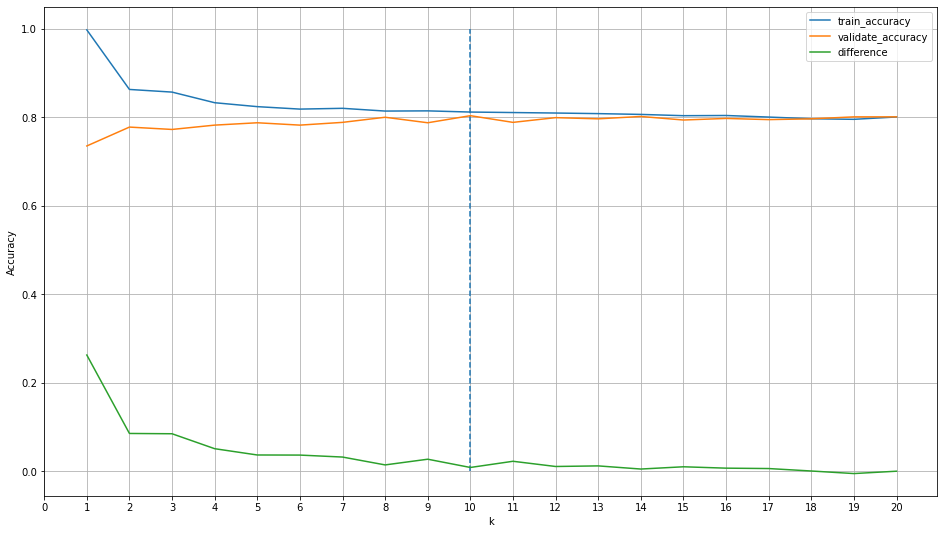

In [9]:
#Taking a look at what the relationship of train, validate and difference of the KNN (with 10 neighbors)model is:
viz.visualize(X_train, y_train, X_validate, y_validate)

## Conclusion - Focus on the Seniors, Singles and Fiber!

### <u> Original Goals Met: </u>
- I found two main demographic drivers (with chi2 hypothesis testing): 
    * <b> Seniors & Singles </b>
        along with two main relate "whys" of churn rate: <b>Internet Service and Payment forms </b>
        
        
- I found a <b> ML classification model that by train, validate and testing has shown an 81% (8% increase of base predictions)</b> that we can now use to put current and future customers' data into and predict their probability of churning. 

### <u> Recommendations: </u>
- ### <i> Focus on current and future Senior and Single Telco customers: 
    *  Fiber Optic account discounts w/ bundled services </b>
    *  Offer a 'friends plan', as the more people on an account, the churn rate lowers.</b>


- ### <i> Get some handle on that Fiber!
    * <b> Looking into the 'why' Fiber accounts are churning.</b>
            - Service?
            - Not user friendly?
            - Users need more Tech support???

### <u> Next Steps: </u>
- ### <i> Reaching out to Product Manager for questions and more data on key churn customers and Fiber.
    *  Exploring more within the payment plans data
    *  Understanding how products are being sold right now and gather some data there.